<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 26 columns):
PurchaseTimestamp                    41476 non-null int64
Auction                              41432 non-null object
VehYear                              41432 non-null float64
Make                                 41432 non-null object
Color                                41432 non-null object
Transmission                         41432 non-null object
WheelType                            41380 non-null object
VehOdo                               41432 non-null float64
Nationality                          41432 non-null object
Size                                 41432 non-null object
TopThreeAmericanName                 41432 non-null object
MMRAcquisitionAuctionAveragePrice    41416 non-null object
MMRAcquisitionAuctionCleanPrice      41429 non-null object
MMRAcquisitionRetailAveragePrice     41429 non-null object
MMRAcquisitonRetailCleanPrice        41327 non-null object
MMRCu

C:\Users\KARTHIK\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


('Train accuracy:', 0.9998288901817186)
('Test accuracy:', 0.8600246381275023)
('Number of nodes: ', 9051L)
             precision    recall  f1-score   support

          0       0.86      0.85      0.86      3231
          1       0.86      0.87      0.86      3263

avg / total       0.86      0.86      0.86      6494

('VehYear', 0.3281543705808828)
('WheelType', 0.27627925062044967)
('Auction', 0.04146068783851632)
('VehOdo', 0.0369017505927465)
('PurchaseTimestamp', 0.030474238135557614)
('VehBCost', 0.029249886669854636)
('TopThreeAmericanName', 0.028114984112964023)
('MMRCurrentRetailRatio', 0.026887427575683357)
('WarrantyCost', 0.017871972148719755)
('VNST', 0.017207711099870723)
('MMRCurrentAuctionAveragePrice', 0.016634068166496555)
('MMRAcquisitionAuctionAveragePrice', 0.01654761957918465)
('MMRAcquisitionRetailAveragePrice', 0.015980774210093196)
('MMRAcquisitionAuctionCleanPrice', 0.015845933403639458)
('Make', 0.015642576697816536)
('Color', 0.015458519721573895)
('MMRCu

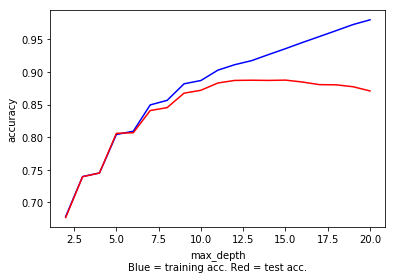

('Train accuracy:', 0.8796242428390542)
('Test accuracy:', 0.8664921465968587)
('Number of nodes:', 251L)
             precision    recall  f1-score   support

          0       0.82      0.94      0.88      3231
          1       0.93      0.79      0.86      3263

avg / total       0.88      0.87      0.87      6494

{'min_samples_split': 90, 'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 20}
('VehYear', 0.46379059845931403)
('WheelType', 0.42742802470198477)
('Auction', 0.05934389143041017)
('TopThreeAmericanName', 0.01384669645679584)
('VehOdo', 0.009414821008894044)
('Make', 0.004462624276163387)
('MMRAcquisitionAuctionCleanPrice', 0.0028013842703454713)
('MMRAcquisitionRetailAveragePrice', 0.002306150352754955)
('PurchaseTimestamp', 0.002248306269200777)
('VehBCost', 0.002170851665300124)
('MMRCurrentAuctionAveragePrice', 0.002159850164001126)
('MMRAcquisitionAuctionAveragePrice', 0.0019391231712716788)
('MMRCurrentRetailCleanPrice', 0.001793112965296232)
('MMRCurrentRe

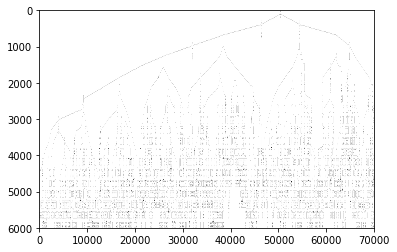

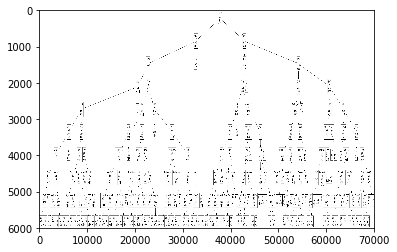

In [2]:
import pandas as pd
import numpy as np
import pydot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from io import StringIO
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import BytesIO as StringIO
from PIL import Image 
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'


#reading csv file
df=pd.read_csv('CaseStudyData.csv')
df=df.drop(['PRIMEUNIT','AUCGUART'],axis=1)
df=df.drop(['PurchaseDate','WheelTypeID','PurchaseID'],axis=1)

print(df.info())

# data Pre-processing
Auction_map={'ADESA':0,'MANHEIM':1,'OTHER':2}
df['Auction']=df['Auction'].map(Auction_map)
df['Auction'].fillna(0,inplace=True)
df['Auction'] = df['Auction'].astype(int)

WheelType_map={'Alloy':0,'Covers':1,'Special':2,'?':0}
df['WheelType']=df['WheelType'].map(WheelType_map)
df['WheelType'].fillna(0,inplace=True)
df['WheelType'] = df['WheelType'].astype(float)

df['MMRAcquisitionAuctionCleanPrice']=df['MMRAcquisitionAuctionCleanPrice'].replace('?',np.NaN)
df['MMRAcquisitionAuctionCleanPrice'].fillna(df['MMRAcquisitionAuctionCleanPrice'].median(skipna=True),inplace=True)
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].astype(float)

df['MMRAcquisitionRetailAveragePrice']=df['MMRAcquisitionRetailAveragePrice'].replace('?',np.NaN)
df['MMRAcquisitionRetailAveragePrice'].fillna(df['MMRAcquisitionRetailAveragePrice'].median(skipna=True),inplace=True)
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].astype(float)

df['MMRAcquisitonRetailCleanPrice']=df['MMRAcquisitonRetailCleanPrice'].replace('?',np.NaN)
df['MMRAcquisitonRetailCleanPrice'].fillna(df['MMRAcquisitonRetailCleanPrice'].median(skipna=True),inplace=True)
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].astype(float)

df['MMRCurrentAuctionCleanPrice']=df['MMRCurrentAuctionCleanPrice'].replace('?',np.NaN)
df['MMRCurrentAuctionCleanPrice'].fillna(df['MMRCurrentAuctionCleanPrice'].median(skipna=True),inplace=True)
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].astype(float)

df['MMRCurrentRetailAveragePrice']=df['MMRCurrentRetailAveragePrice'].replace('?',np.NaN)
df['MMRCurrentRetailAveragePrice'].fillna(df['MMRCurrentRetailAveragePrice'].median(skipna=True),inplace=True)
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].astype(float)

df['MMRCurrentRetailCleanPrice']=df['MMRCurrentRetailCleanPrice'].replace('?',np.NaN)
df['MMRCurrentRetailCleanPrice'].fillna(df['MMRCurrentRetailCleanPrice'].median(skipna=True),inplace=True)
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].astype(float)

Make_map={'ACURA':0,'BUICK':1,'CADILLAC':3,'CHEVROLET':4,'CHRYSLER':5,'DODGE':6,'FORD':7,'GMC':8,'HONDA':9,'HYUNDAI':10,'INFINITI':11,'ISUZU':12,'JEEP':13,'KIA':14,'LEXUS':15,'LINCOLN':16,'MAZDA':17,'MERCURY':18,'MINI':19,'MITSUBISHI':20,'NISSAN':21,'OLDSMOBILE':22,'PONTIAC':23,'SATURN':24,'SCION':25,'SUBARU':26,'SUZUKI':27,'TOYOTA':27,'VOLKSWAGEN':28,'VOLVO':29,'?':4}
df['Make']=df['Make'].map(Make_map)
df['Make'].fillna(4,inplace=True)
df['Make'] = df['Make'].astype(float)

Color_map={'BEIGE':0,'BLACK':1,'BLUE':2,'BROWN':3,'GOLD':4,'GREEN':5,'GREY':6,'MAROON':7,'NOT AVAIL':8,'ORANGE':9,'OTHER':10,'PURPLE':11,'RED':12,'SILVER':13,'WHITE':14,'YELLOW':15,'?':13}
df['Color']=df['Color'].map(Color_map)
df['Color'].fillna(13,inplace=True)
df['Color'] = df['Color'].astype(int)

Transmission_map={'AUTO':0,'MANUAL':1,'?':0,'Manual':1}
df['Transmission']=df['Transmission'].map(Transmission_map)
df['Transmission'].fillna(0,inplace=True)
df['Transmission'] = df['Transmission'].astype(int)

vehodo_map={'?':df['VehOdo'].mean()}
df['VehOdo'].fillna(df['VehOdo'].mean(),inplace=True)
df['VehOdo'] = df['VehOdo'].astype(int)

Nationality_map={'AMERICAN':0,'OTHER':1,'OTHER ASIAN':2,'TOP LINE ASIAN':3,'USA':0,'?':0}
df['Nationality']=df['Nationality'].map(Nationality_map)
df['Nationality'].fillna(0,inplace=True)
df['Nationality'] = df['Nationality'].astype(int)

Size_map={'COMPACT':0,'CROSSOVER':1,'LARGE':2,'LARGE SUV':3,'LARGE TRUCK':4,'MEDIUM':5,'MEDIUM SUV':6,'SMALL SUV':7,'SMALL TRUCK':8,'SPECIALTY':9,'SPORTS':10,'VAN':11,'?':5}    
df['Size']=df['Size'].map(Size_map)
df['Size'].fillna(5,inplace=True)
df['Size'] = df['Size'].astype(int)

df['VehYear'].fillna(2006.0,inplace=True)
df['VehYear'] = df['VehYear'].astype(int)

american_name_map={'CHRYSLER':0,'FORD':1,'GM':2,'OTHER':3,'?':2}
df['TopThreeAmericanName']=df['TopThreeAmericanName'].map(american_name_map)
df['TopThreeAmericanName'].fillna(2,inplace=True)
df['TopThreeAmericanName'] = df['TopThreeAmericanName'].astype(int)

df['MMRAcquisitionAuctionAveragePrice']=df['MMRAcquisitionAuctionAveragePrice'].replace('?',np.NaN)
df['MMRAcquisitionAuctionAveragePrice'].fillna(df['MMRAcquisitionAuctionAveragePrice'].median(skipna=True),inplace=True)
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].astype(float)

df['MMRCurrentAuctionAveragePrice']=df['MMRCurrentAuctionAveragePrice'].replace('?',np.NaN)
df['MMRCurrentAuctionAveragePrice'].fillna(df['MMRCurrentAuctionAveragePrice'].median(skipna=True),inplace=True)
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].astype(float)

df['MMRCurrentRetailRatio']=df['MMRCurrentRetailRatio'].replace(['?','#VALUE!'],np.NaN)
df['MMRCurrentRetailRatio'].fillna(df['MMRCurrentRetailRatio'].median(skipna=True),inplace=True)
df['MMRCurrentRetailRatio'] = df['MMRCurrentRetailRatio'].astype(float)

vnst_map = {'TX':0, 'FL':1,'CO':2,'NC':3,'AZ':4,'CA':5,'OK':6,'SC':7,'TN':8,'GA':9,'VA':10,'MO':11,'PA':12,'NV':13,'IN':14,'MS':15,'LA':16,'NJ':17,'NM':18,'KY':19,'AL':20,'IL':21,'UT':22,'WV':23,'WA':24,'OR':25,'NH':26,'NE':27,'OH':28,'ID':29,'NY':30,'?':0}
df['VNST'] = df['VNST'].map(vnst_map)
df['VNST'].fillna(0,inplace=True)
df['VNST'] = df['VNST'].astype(int)

df['VehBCost']=df['VehBCost'].replace(['?'],np.NaN)
df['VehBCost'].fillna(0,inplace=True)
df['VehBCost'] = df['VehBCost'].astype(int)

mmr4_map={'0':0,'1':1,'-1':1,'4':1,'2':1,'?':0}
df['IsOnlineSale']=df['IsOnlineSale'].map(mmr4_map)
df['IsOnlineSale'].fillna(0,inplace=True)
df['IsOnlineSale'] = df['IsOnlineSale'].astype(float)

ForSale_map={'Yes':0,'YES':0,'yes':0,'No':1,'?':0}
df['ForSale']=df['ForSale'].map(ForSale_map)
df['ForSale'].fillna(0,inplace=True)
df['ForSale'] = df['ForSale'].astype(float)

df['WarrantyCost'].fillna(df['WarrantyCost'].mean(),inplace=True)
df['WarrantyCost'] = df['WarrantyCost'].astype(int)

#decision tree
y = df['IsBadBuy']
X = df.drop(['IsBadBuy'], axis=1)
rs = 12

#Data distribution
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .1,random_state=12)
sm = SMOTE(random_state=12, ratio = 1.0)
x_res, y_res = sm.fit_sample(X_train, y_train)
x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(x_res,y_res,test_size = .2,random_state=12)
model = DecisionTreeClassifier(random_state=rs)
model.fit(x_train_res, y_train_res)
print("Train accuracy:", model.score(x_train_res, y_train_res))
print("Test accuracy:", model.score(x_val_res, y_val_res))
print("Number of nodes: ",model.tree_.node_count)
y_pred = model.predict(x_val_res)
print(classification_report(y_val_res, y_pred))

importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], importances[i])
    
#Visualising relationship between hyperparameters and model performance
test_score = []
train_score = []

# check the model performance for max depth from 2-20
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
    model.fit(x_train_res, y_train_res)
    
    test_score.append(model.score(x_val_res, y_val_res))
    train_score.append(model.score(x_train_res, y_train_res))
    
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(7, 10),
          'min_samples_leaf': range(20, 60, 10),
         'min_samples_split' : range(10,100,20)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(x_train_res, y_train_res)

print("Train accuracy:", cv.score(x_train_res, y_train_res))
print("Test accuracy:", cv.score(x_val_res, y_val_res))
print("Number of nodes:", cv.best_estimator_.tree_.node_count)
# test the best model
y_pred = cv.predict(x_val_res)
print(classification_report(y_val_res, y_pred))

# print parameters of the best model
print(cv.best_params_)

importances = cv.best_estimator_.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], importances[i])


# visualize default-setting tree
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("C:\Users\KARTHIK\Documents\semester 3\case study-1\default_tree.png")
img = Image.open("C:\Users\KARTHIK\Documents\semester 3\case study-1\default_tree.png")
new_width  = 70000
new_height =6000
img = img.resize((new_width, new_height), Image.ANTIALIAS)
img.save("C:\Users\KARTHIK\Documents\semester 3\case study-1\default_tree.png")
imgplot = plt.imshow(img,interpolation='nearest',aspect='auto')
plt.show()

#visualize gridSearchCV tree
dotfile = StringIO()
export_graphviz(cv.best_estimator_, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("C:\Users\KARTHIK\Documents\semester 3\case study-1\gridSearchCV.png")
img1 = Image.open("C:\Users\KARTHIK\Documents\semester 3\case study-1\gridSearchCV.png")
img1 = img1.resize((new_width, new_height), Image.ANTIALIAS)
img1.save("C:\Users\KARTHIK\Documents\semester 3\case study-1\gridSearchCV.png")
imgplot = plt.imshow(img1,interpolation='nearest',aspect='auto')
plt.show()
